# Coronavirus (Covid-19)


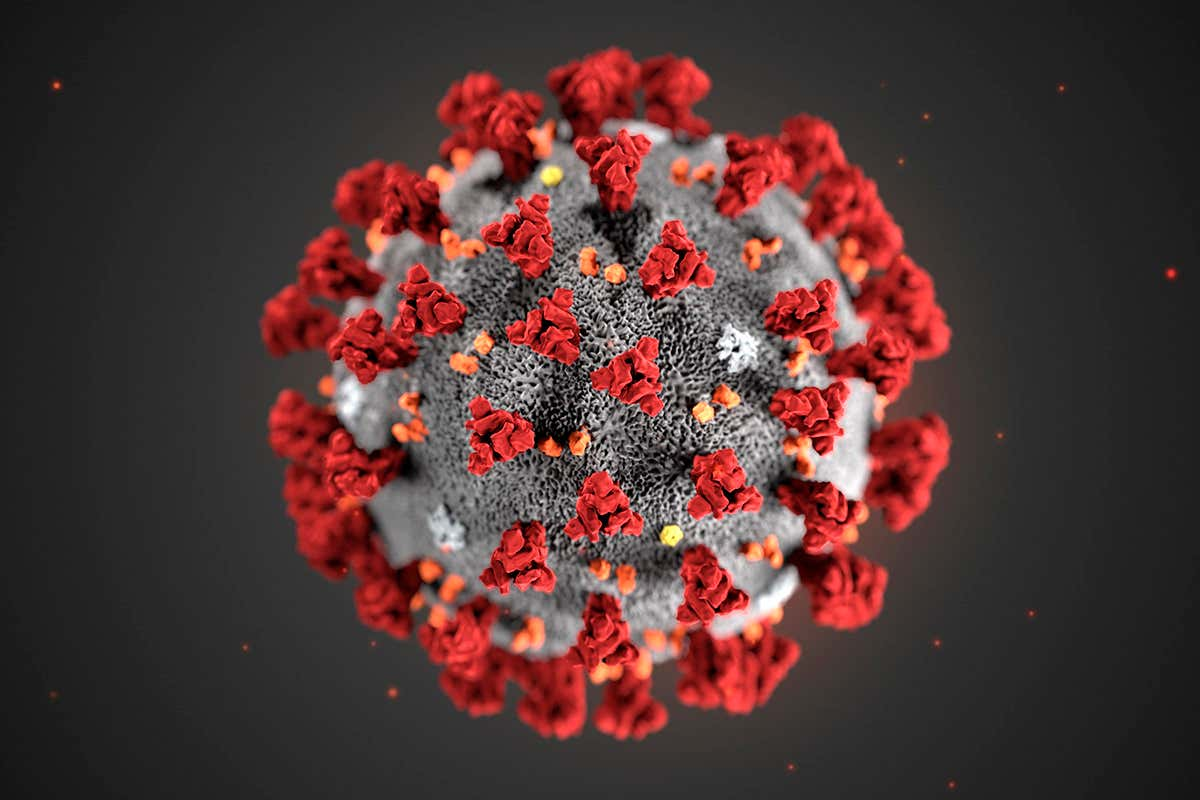
















## What is Covid-19?

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

## How can we keep ourselves safe form Covid-19?

To prevent infection and to slow transmission of COVID-19, do the following:

* Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.
* Maintain at least 1 metre distance between you and people coughing or sneezing.
* Avoid touching your face.
* Cover your mouth and nose when coughing or sneezing.
* Stay home if you feel unwell.
* Refrain from smoking and other activities that weaken the lungs.
* Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people.

 ## COVID-19 Symptoms:

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

**Most common symptoms:** 
* fever.
* dry cough.
* tiredness.

**Less common symptoms:**
* aches and pains.
* sore throat.
* diarrhoea.
* conjunctivitis.
* headache.
* loss of taste or smell.
* a rash on skin, or discolouration of fingers or toes.

**Serious symptoms:**
* difficulty breathing or shortness of breath.
* chest pain or pressure.
* loss of speech or movement.
* Seek immediate medical attention if you have serious symptoms.  Always call before visiting your doctor or health facility. 

People with mild symptoms who are otherwise healthy should manage their symptoms at home. 

On average it takes 5–6 days from when someone is infected with the virus for symptoms to show, however it can take up to 14 days. 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime 
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [ ]:
Total_World = pd.read_csv('/kaggle/input/covid19/Total_World_covid-19.csv')
Total_World.head()

In [ ]:
Total_India = pd.read_csv("/kaggle/input/covid19/Total_India_covid-19.csv")
Total_India.head()

In [ ]:
date = datetime.datetime.today().strftime('%d-%m-%Y')
date

In [ ]:
TotalWD = {'Confirmed':Total_World['Confirmed'].sum(),'Active':Total_World['Active'].sum(),
        'Recovered':Total_World['Recovered'].sum(),'Deaths':Total_World['Deaths'].sum()}
print(TotalWD)

In [ ]:
TotalIND = {'Confirmed':Total_India['Confirmed'].sum(),'Active':Total_India['Active'].sum(),
        'Recovered':Total_India['Recovered'].sum(),'Deaths':Total_India['Deaths'].sum()}
print(TotalIND)

In [ ]:
colors = ['darkorange', 'green', 'red']
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(labels=[x[0] for x in TotalWD.items()][1:], 
                     values=[x[1] for x in TotalWD.items()][1:],
                     pull=[0.05, 0.03, 0.05],hole=0.6),row=1,col=1)
fig.add_trace(go.Pie(labels=[x[0] for x in TotalIND.items()][1:], 
                     values=[x[1] for x in TotalIND.items()][1:],
                     pull=[0.05, 0.03, 0.05],hole=0.6),row=1,col=2)
fig.update_traces(textinfo='label+percent',hoverinfo='percent+label+value',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title=
                  {'text':'Total Covid-19 Cases in World : '+str([x[1] for x in TotalWD.items()][0])+'  |  '+
                          'Total Covid-19 Cases in India : '+str([x[1] for x in TotalIND.items()][0]),
                         'y':0.9,'x':0.50,'xanchor': 'center','yanchor': 'top'},
                          annotations=[dict(text='World', x=0.155, y=0.5, font_size=40, showarrow=False),
                                       dict(text='India', x=0.84, y=0.5, font_size=40, showarrow=False)],
                          legend=dict(x=.9, y=-.18), legend_title_text='Date: '+date)
fig.show()

In [ ]:
map = px.choropleth(Total_World,locations='Country',locationmode='country names',
                    color = 'Confirmed',
                    color_continuous_scale=px.colors.sequential.Rainbow, 
                    hover_name='Country',
                    hover_data = ['Confirmed','Active','Recovered','Deaths'])
map.update_layout(title={'text':'Total Confirmed Covid-19 Cases Worldwide',
                     'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
map.show()

In [ ]:
confirmed = px.pie(Total_India,values='Confirmed',names='State',hover_data=['Statecode'])
confirmed.update_traces(textposition='inside', textinfo='percent+label',textfont_size=12)
confirmed.update_layout(title={'text':'Total Confirmed Covid-19 Cases in India',
                          'y':0.95,'x':0.37,'xanchor': 'center','yanchor': 'top'},
                        legend_title_text='States')
confirmed.show()

In [ ]:
deaths = px.pie(Total_India,values='Deaths',names='State', hover_data=['Statecode'])
deaths.update_traces(textposition='inside', textinfo='percent+label',textfont_size=12)
deaths.update_layout(title={'text':'Total Deaths due to Covid-19 in India',
                     'y':0.95,'x':0.37,'xanchor': 'center','yanchor': 'top'},
                     legend_title_text='States')
deaths.show()

In [ ]:
fig1 = go.Figure(data=[go.Bar(
            name='Confirmed',
            x=Total_India[:10].sort_values('Confirmed')['Confirmed'],
            y=Total_India[:10].sort_values('Confirmed')['State'],
            orientation='h')])
fig1.update_traces(showlegend=True,marker=dict(color='darkblue',
                                               line=dict(color='#000000', width=1)))
fig1.update_layout(title={'text': "Confirmed Covid-19 Cases India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Confirmed", yaxis_title="States",
                           legend=dict(x=.8, y=-.16))
fig1.show()

In [ ]:
fig2 = go.Figure(data=[go.Bar(
            name='Active',
            x=Total_India[:10].sort_values('Active')['Active'],
            y=Total_India[:10].sort_values('Active')['State'],
            orientation='h')])
fig2.update_traces(showlegend=True,marker=dict(color='darkorange',
                                               line=dict(color='#000000', width=1)))
fig2.update_layout(title={'text': "Active Covid-19 Cases India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                  xaxis_title="Active", yaxis_title="States",legend=dict(x=.8, y=-.16))
fig2.show()

In [ ]:
fig3 = go.Figure(data=[go.Bar(
            name='Deaths',
            x=Total_India[:10].sort_values('Deaths')['Deaths'],
            y=Total_India[:10].sort_values('Deaths')['State'],
            orientation='h')])
fig3.update_traces(showlegend=True,marker=dict(color='red',line=dict(color='#000000', width=1)))
fig3.update_layout(title={'text': "Deaths due to Covid-19 in India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Deaths", yaxis_title="States",
                          legend=dict(x=.8, y=-.16))
fig3.show()

In [ ]:
fig4 = go.Figure(data=[go.Bar(
            name='Active',
            x=Total_India[:10].sort_values('Recovered')['Recovered'],
            y=Total_India[:10].sort_values('Recovered')['State'],
            orientation='h')])
fig4.update_traces(showlegend=True,marker=dict(color='green',line=dict(color='#000000', width=1)))
fig4.update_layout(title={'text': "Recovered Covid-19 Cases India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Recovered", yaxis_title="States",
                          legend=dict(x=.8, y=-.16))
fig4.show()

In [ ]:
Daily_India = pd.read_csv('/kaggle/input/covid19/Daily_India_covid-19.csv')
Daily_India = Daily_India.iloc[32:,:]
Daily_India.reset_index(level=0,inplace=True)
Daily_India.drop('index',axis=1,inplace=True)
Daily_India.head()

In [ ]:
total_c_fig = go.Figure()
total_c_fig.add_trace(go.Scatter(x=Daily_India['Date'],y=Daily_India['Total Confirmed'],
                                 mode='lines+markers',
                                 name='Daily Confirmed'))
total_c_fig.update_traces(showlegend=True,marker=dict(size=7,color='darkblue',
                                                      line=dict(color='#000000', width=1)))
total_c_fig.update_layout(title={'text': "Total Covid-19 Cases",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Total Coronavirus Cases",
                          legend=dict(x=.8, y=-.35))
total_c_fig.show()

In [ ]:
daily_c_fig  = go.Figure([go.Bar(x=Daily_India['Date'],y=Daily_India['Daily Confirmed'],name ='Confirmed')])
daily_c_fig.update_traces(showlegend=True,marker=dict(color='darkblue',
                                                      line=dict(color='#000000', width=1)))
daily_c_fig.update_layout(title={'text': "Daily Confirmed",
                          'y':0.84,'x':0.48,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Daily Coronavirus Cases",
                          legend=dict(x=.8, y=-.35))
daily_c_fig.show()

In [ ]:
total_a_fig = go.Figure()
total_a_fig.add_trace(go.Scatter(x=Daily_India['Date'],y=Daily_India['Total Active'],
                                 mode='lines+markers',
                                 name='Daily Active'))
total_a_fig.update_traces(showlegend=True,marker=dict(size=7,color='darkorange',
                                                      line=dict(color='#000000', width=1)))
total_a_fig.update_layout(title={'text': "Active Cases",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Total Coronavirus Cases",
                          legend=dict(x=.8, y=-.35))
total_a_fig.show()

In [ ]:
total_r_fig = go.Figure()
total_r_fig.add_trace(go.Scatter(x=Daily_India['Date'],y=Daily_India['Total Recovered'],
                                 mode='lines+markers',
                                 name='Daily Recovered'))
total_r_fig.update_traces(showlegend=True,marker=dict(size=7,color='green',
                                                      line=dict(color='#000000', width=1)))
total_r_fig.update_layout(title={'text': "Recovered Cases",
                          'y':0.9,'x':0.45,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Total Recovered Cases",
                          legend=dict(x=.8, y=-.35))
total_r_fig.show()

In [ ]:
daily_r_fig  = go.Figure([go.Bar(x=Daily_India['Date'],y=Daily_India['Daily Recovered'],name='Recovered')])
daily_r_fig.update_traces(showlegend=True,marker=dict(color='green',
                                                      line=dict(color='#000000', width=1)))
daily_r_fig.update_layout(title={'text': "Daily Recovered",
                          'y':0.9,'x':0.45,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Daily Recovered Cases",
                          legend=dict(x=.8, y=-.35))
daily_r_fig.show()

In [ ]:
total_d_fig = go.Figure()
total_d_fig.add_trace(go.Scatter(x=Daily_India['Date'],y=Daily_India['Total Deaths'],
                                 mode='lines+markers',
                                 name='Daily Deaths'))
total_d_fig.update_traces(showlegend=True,marker=dict(size=7,color='red',
                                                      line=dict(color='#000000', width=1)))
total_d_fig.update_layout(title={'text': "Total Deaths",
                          'y':0.9,'x':0.45,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Total Coronavirus Deaths",
                          legend=dict(x=.8, y=-.35))
total_d_fig.show()

In [ ]:
daily_d_fig  = go.Figure([go.Bar(x=Daily_India['Date'],y=Daily_India['Daily Deaths'],name='Deaths'),])
daily_d_fig.update_traces(showlegend=True,marker=dict(color='red',line=dict(color='#000000', width=1)))
daily_d_fig.update_layout(title={'text': "Daily Deaths",
                          'y':0.9,'x':0.45,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Daily Coronavirus Deaths",
                          legend=dict(x=.8, y=-.35))
daily_d_fig.show()

In [ ]:
# Last 20 days trend in India
last_days_trend = go.Figure()
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Confirmed'],
                                 mode='lines+markers',
                                 name='Daily Confirmed',
                                 line=dict(color='darkblue', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Active'],
                                 mode='lines+markers',
                                 name='Daily Active',
                                 line=dict(color='darkorange', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Recovered'],
                                 mode='lines+markers',
                                 name='Daily Recovered',
                                 line=dict(color='green', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Deaths'],
                                 mode='lines+markers',
                                 name='Daily Deaths',
                                 line=dict(color='red', width=3)))
last_days_trend.update_traces(showlegend=True,marker=dict(size=7,line=dict(color='#000000', width=1)))
last_days_trend.update_layout(title={'text': "Covid-19 Trend In India (Last 20 Days)",
                                      'y':0.9,'x':0.50,
                                      'xanchor': 'center','yanchor': 'top'},
                                       xaxis_title="Date", yaxis_title="Daily Coronavirus Cases",
                                       legend_orientation="h",
                                       legend=dict(x=0.20, y=-.25))
last_days_trend.show()

In [ ]:
daily_states_c = pd.read_csv('/kaggle/input/covid19/Daily_States_Confirmed_india.csv')
daily_states_r = pd.read_csv('/kaggle/input/covid19/Daily_States_Recovered_india.csv')
daily_states_d = pd.read_csv('/kaggle/input/covid19/Daily_States_Deaths_india.csv')

In [ ]:
daily_states_c.head()

In [ ]:
# Top 8 states trend
titles = ('Maharashtra','Gujarat','Tamil Nadu','Delhi','Rajasthan',
          'Madhya Pradesh','Uttar Pradesh','Andhra Pradesh')
daily_states = make_subplots(rows=4,cols=2,subplot_titles=titles,
                             column_widths=[0.5, 0.5],row_heights=[20,20,20,20])
# Maharashtra
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['MH'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3)),row=1, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['MH'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3)),row=1, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['MH'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3)),row=1, col=1)

# Gujarat
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['GJ'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=1, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['GJ'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=1, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['GJ'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=1, col=2)

# Tamil Nadu
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['TN'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=2, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['TN'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=2, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['TN'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=2, col=1)

# Delhi
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['DL'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=2, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['DL'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=2, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['DL'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=2, col=2)

#Rajasthan
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['RJ'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=3, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['RJ'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=3, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['RJ'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=3, col=1)

#Madhya Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['MP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=3, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['MP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=3, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['MP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=3, col=2)

#Uttar Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['UP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=4, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['UP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=4, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['UP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=4, col=1)

# Andra Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['AP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkblue', width=3),showlegend=False),row=4, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['AP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=4, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['AP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=4, col=2)


daily_states.update_traces(marker=dict(size=4,color='orange',
                                       line=dict(color='#000000', width=1)))

daily_states.update_layout(
    title={'text': "Covid-19 Top 8 States India (Last 20 Days)",
            'y':0.98,'x':0.50,'xanchor': 'center','yanchor': 'top'},
            height=1000,width=800,legend=dict(x=-0.1, y=1.1))

daily_states.update_xaxes(title_text="Date", row=4, col=1)
daily_states.update_xaxes(title_text="Date", row=4, col=2)

daily_states.update_yaxes(title_text="Cases", row=1, col=1)
daily_states.update_yaxes(title_text="Cases", row=2, col=1)
daily_states.update_yaxes(title_text="Cases", row=3, col=1)
daily_states.update_yaxes(title_text="Cases", row=4, col=1)

daily_states.show()

In [ ]:
# Maharashtra
Total_MH = pd.read_csv('/kaggle/input/covid19/Total_Maharashtra_covid-19.csv')
fig_m = go.Figure(data=[go.Table(
    header=dict(values=list(Total_MH[:10].columns),
                font=dict(color='black', size=12),
                fill_color='lightslategray',
                align='center',height=40),
    cells=dict(values=[Total_MH[:10].District,Total_MH[:10].Active,Total_MH[:10].
                       Confirmed,Total_MH[:10].Deaths,Total_MH[:10].Recovered],
               font=dict(color='black', size=12),
               fill=dict(color=['turquoise', 'darkorange','royalblue','red','green']),
               align='center',height=30))
])

fig_m.show()

In [ ]:
Mah = make_subplots( rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
Mah.add_trace(go.Pie(labels=Total_MH['District'],values=Total_MH['Confirmed'],
                     hoverinfo='label+value+percent'),row=1,col=1)
Mah.add_trace(go.Pie(labels=Total_MH['District'],values=Total_MH['Deaths'],
                     hoverinfo='label+value+percent'),row=1,col=2)
Mah.update_traces(showlegend=False,textposition='inside', textinfo='percent+label',textfont_size=12,
                 marker=dict(colors=px.colors.cyclical.HSV_r, line=dict(color='#000000', width=1)))
Mah.update_layout(title={'text':'Maharashtra Covid-19 Cases',
                     'y':0.9,'x':0.49,'xanchor': 'center','yanchor': 'top'},legend_title_text='States',
                 annotations=[dict(text='Confirmed', x=0.15, y=-0.18, font_size=20, showarrow=False),
                              dict(text='Deaths', x=0.84, y=-0.18, font_size=20, showarrow=False)])
Mah.show()

In [ ]:
Dai = make_subplots(rows=2,cols=2)
Dai.add_trace(go.Bar(x=daily_states_c[-45:]['Date'],y=daily_states_c[-45:]['MH'],
                                  name='Daily Confirmed'),row=1, col=1)

Dai.add_trace(go.Bar(x=daily_states_d[-45:]['Date'],y=daily_states_d[-45:]['MH'],
                                  name='Daily Deaths'),row=1, col=2)
Dai.add_trace(go.Bar(x=daily_states_d[-45:]['Date'],y=daily_states_r[-45:]['MH'],
                                  name='Daily Recovered'),row=2, col=1)
Dai.update_traces(showlegend=True,marker=dict(line=dict(color='#000000', width=1)))
Dai.update_layout(title={'text': "Daily Maharashtra Updates",
                          'y':0.9,'x':0.50,
                          'xanchor': 'center','yanchor': 'top'},
                          legend=dict(x=.65, y=.15),height=600)

Dai.update_xaxes(title_text = 'Date',row=2,col=1)

Dai.update_yaxes(title_text = 'Daily Confirmed',row=1,col=1)
Dai.update_yaxes(title_text = 'Daily Deaths',row=1,col=2)
Dai.update_yaxes(title_text = 'Daily Recovered',row=2,col=1)

Dai.show()

# STAY HOME. STAY SAFE!